# Métodos de suavización exponencial (ES)

- El presente capítulo trata del `suavizado de datos en la señal de series temporales`. El capítulo está organizado como sigue:

    - `Introducción al suavizado de series temporales`

    - `Suavizado exponencial de primer orden`

    - `Suavizado exponencial de segundo orden`

    - `Suavizado exponencial de orden superior`
    

## Introducción al suavizado de series temporales

- Los datos de las series temporales se componen de `señal y ruido`, donde la `señal captura la dinámica intrínseca del proceso`; sin embargo, el `ruido representa el componente no modelado de la señal o error aleatorio no correlacionado, el cual en diferentes tiempos es estadísticamente independiente`. La dinámica intrínseca de una señal de serie temporal puede ser tan simple como `la media del proceso` o puede ser una forma funcional compleja dentro de las observaciones, como se representa aquí:

    $$
    \\[1mm]
    y_{t}=f(t, \boldsymbol{\beta})+\varepsilon_{t},\quad\text{para}\quad i=1,2,3,\dots,T,
    $$
    
    donde $y_{t}$ representa las observaciones, $\boldsymbol{\beta}$ es un vector de parámetros desconocidos, y $\varepsilon_{t}$ es el error no correlacionado, usualmente con media 0 y desviación 1.
    
- $f(t, \boldsymbol{\beta})$ `denota la forma funcional de la señal`. Un ejemplo puede ser una constante (`media`) como forma funcional:

    $$
    y_{t}=\mu+\varepsilon_{t}
    $$

- Dado que $\varepsilon_{t}$ es `ruido blanco`, este enfoque basado en el suavizado ayuda a `separar la forma funcional intrínseca del ruido aleatorio, cancelándolo`. Los métodos predictivos de suavización pueden considerarse como filtros que toman datos de entrada y `separan los componentes de tendencia y de ruido`, como se muestra en la {numref}`fig1_chapter2`

```{figure} ./figures/fig1_chapter2.png
:name: fig1_chapter2
:align: center

Separación de componentes de tendencia y ruido.
```

- La eficacia de la extracción de la tendencia y ruido estimados depende de otros parámetros relacionados con la composición de la señal de la serie temporal, como la presencia de `tendencia, estacionalidad y residual (ruido)`. Para tratar cada uno de estos componentes de las series temporales, se requieren diferentes tratamientos. En este capítulo se tratarán `múltiples enfoques de suavización para manejar los diferentes componentes de la señal` de la serie temporal.

- Un ejemplo de una señal de serie temporal compuesta por `tendencia, estacionalidad y ruido blanco`, es el conjunto de datos de `nacimientos mensuales en Nueva York desde enero de 1946 hasta diciembre de 1959`:

In [2]:
import requests
import statsmodels.api as sm
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pmdarima import arima
from pmdarima import datasets
from pmdarima import utils

In [3]:
sns.set_style("darkgrid")

In [4]:
DATA_URL="http://robjhyndman.com/tsdldata/data/nybirths.dat"
fopen = requests.get(DATA_URL).content
ds=pd.read_csv(io.StringIO(fopen.decode('utf-8')),  header=None, names=['birthcount'])
ds.head()

,birthcount
0,26.663
1,23.598
2,26.931
3,24.740
4,25.806


In [5]:
date=pd.date_range("1946-01-01", "1959-12-31", freq="1M")
ds['Date']=pd.DataFrame(date)
ds = ds.set_index('Date')

In [6]:
ds.head()

,birthcount
Date,
1946-01-31,26.663
1946-02-28,23.598
1946-03-31,26.931
1946-04-30,24.740
1946-05-31,25.806


In [8]:
ds.index = pd.to_datetime(ds.index)

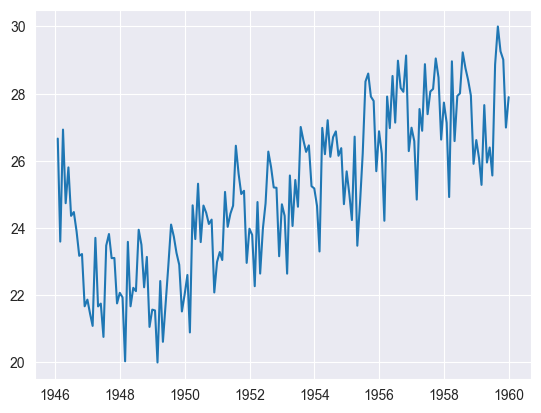

In [9]:
plt.plot(ds.birthcount);

- Observar el cambio en la `magnitud de las fluctuaciones` de manera visual, suele ser una tarea tediosa para ciertas series de tiempo. Por lo tanto, utilizaremos técnicas basadas en el cálculo del término ($s_{t}+\varepsilon_{t}$) o factor ($s_{t}\times\varepsilon_{t}$) y su respectiva visualización. Si la magnitud de las fluctuaciones obtenidas son similares entonces concluimos que la serie de tiempo es aditiva o multiplicativa según sea el caso. `Es un buen ejercicio para el estudiante calcular la magnitud de dichas fluctuaciones y visualizarlas`

`En esta serie temporal de los nacimientos en NY desde 1946 a 1960. En ela se puede apreciar un patrón de cambio (estacionareidad) así como una tendencia al alza (estacionalidad), los cuales son aspectos de suma importancia para los pronosticos con bajo margen de error.`

In [10]:
figure_kwargs = {'figsize': (6, 6)}

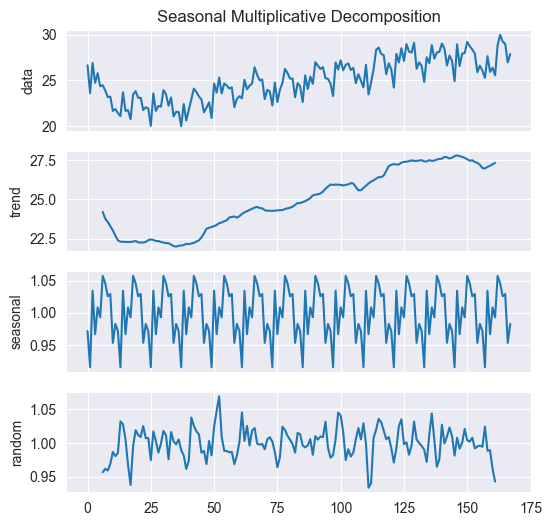

In [11]:
decomposed = arima.decompose(ds.birthcount.values, 'multiplicative', m=12)
axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs, show=False)
axes[0].set_title("Seasonal Multiplicative Decomposition");

- Las diferentes funciones del código se utilizan como sigue:
    - La función `requests.get` del script anterior se utiliza para obtener los datos del url `DATA_URL`.
    - Para manejar el conjunto de datos, se utiliza un `DataFrame` de `pandas`.
    
- La función `seasonal_decompose` del módulo `stats models` se utiliza para `descomponer la señal de la serie temporal en componentes de tendencia, estacionalidad y residual`. La descomposición puede ser `aditiva o multiplicativa`. Un ejemplo de las diferentes componentes de una señal se muestra en el siguiente script

`En la figura anterior se presenta de manera separada los elementos que contiene la serie temporal. En ese sentido, se puede observar una tendencia al alza, un comportamiento ciclico del cambio, y un grado de aleatoriedad.`

````{admonition} Observación
:class: tip

Normalmente, podemos identificar una serie temporal `aditiva`

$$y_{t}=f_{t}+s_{t}+\varepsilon_{t}$$

o `multiplicativa`

$$y_{t}=f_{t}\times s_{t}\times\varepsilon_{t}$$

a partir de su variación. `Si la magnitud del componente estacional cambia con el tiempo, la serie es multiplicativa`. En caso contrario, la serie es aditiva.

````

In [12]:
import datetime

In [13]:
dates_airpass = pd.date_range(start='1949-01', periods=len(datasets.load_airpassengers()), freq='M').strftime('%Y-%m')
air_pass_df = pd.DataFrame({'Date': dates_airpass.tolist(),
                            'Passengers': datasets.load_airpassengers().tolist()})
air_pass_df.head()

,Date,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [14]:
beer_aust = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_aust.rename(columns={"Quarterly beer production in Australia: megalitres. March 1956 ? June 1994": "beer_prod"}, inplace=True)
beer_aust.head()

,Quarter,beer_prod
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


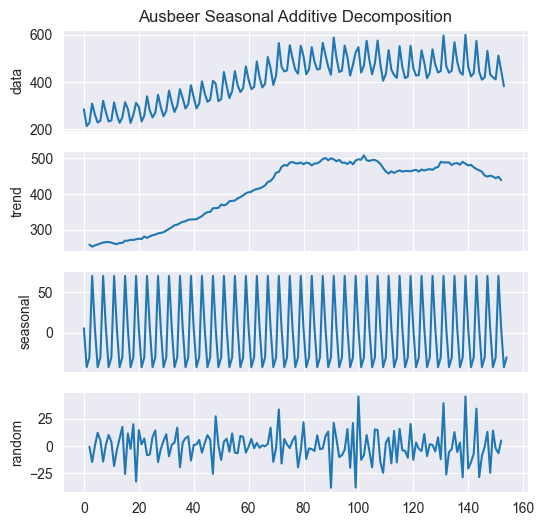

In [15]:
decomposed = arima.decompose(beer_aust.beer_prod, 'additive', m=4)
axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs, show=False)
axes[0].set_title("Ausbeer Seasonal Additive Decomposition");

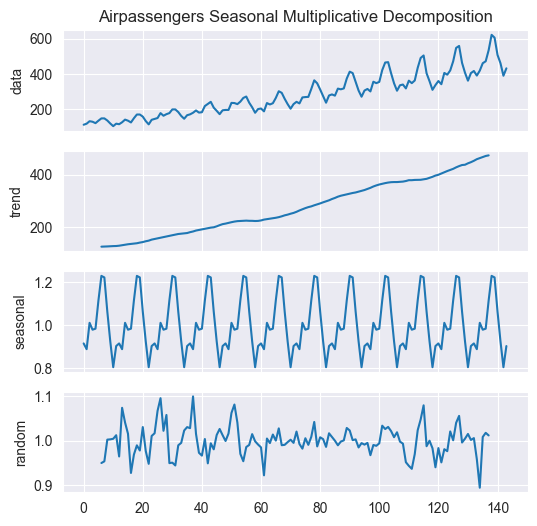

In [16]:
decomposed = arima.decompose(datasets.load_airpassengers(), 'multiplicative', m=12)
axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs, show=False)
axes[0].set_title("Airpassengers Seasonal Multiplicative Decomposition");

- Las propiedades de estacionalidad aditiva y multiplicativa, se pueden estimar de manera experimental de la siguiente forma: `si la estacionalidad es aditiva, entonces el resultado de la resta entre la serie de tiempo origina y su media movil tendrá fluctuaciones casi similares en magnitud. Si es multiplicativa, entonces el resultado de la división tiene esta propiedad`. Veamos esto en el siguiente ejemplo

In [17]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return pd.DataFrame(np.convolve(interval, window, 'same'), columns=['MA'])

In [18]:
dates_airpassl = dates_airpass.tolist()

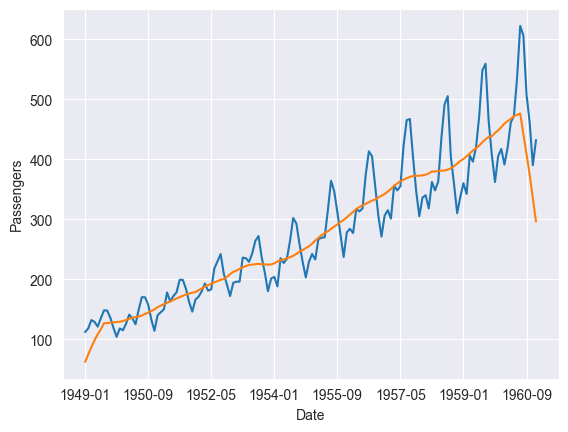

In [19]:
fig, ax = plt.subplots()
ax.plot(dates_airpassl, datasets.load_airpassengers())
ax.plot(dates_airpassl, movingaverage(datasets.load_airpassengers(), 12));
freq = int(20)
ax.set_xticks(dates_airpassl[::freq]);
ax.set_xticklabels(dates_airpassl[::freq]);
ax.set_xlabel('Date');
ax.set_ylabel('Passengers');

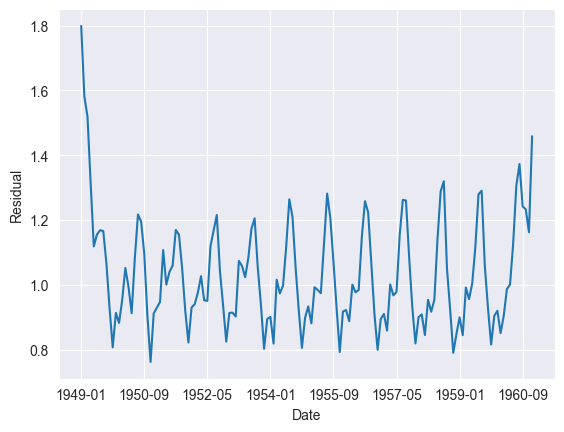

In [20]:
fig, ax = plt.subplots()
ax.plot(dates_airpassl, datasets.load_airpassengers()/movingaverage(datasets.load_airpassengers(), 12).MA.values);
freq = int(20)
ax.set_xticks(dates_airpassl[::freq]);
ax.set_xticklabels(dates_airpassl[::freq]);
ax.set_xlabel('Date');
ax.set_ylabel('Residual');

In [21]:
dates_beerpl = beer_aust.Quarter.tolist()

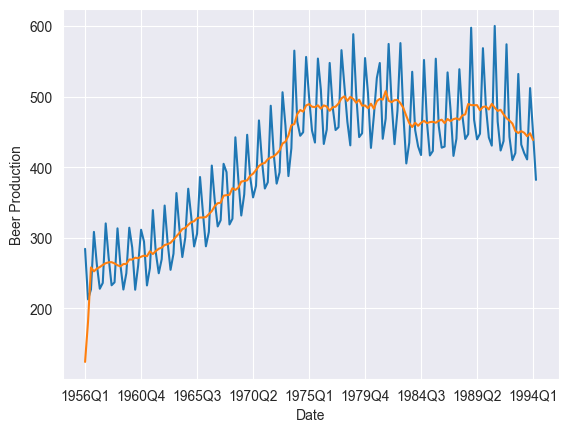

In [22]:
fig, ax = plt.subplots()
ax.plot(dates_beerpl, beer_aust.beer_prod)
ax.plot(movingaverage(beer_aust.beer_prod, 4));
freq = int(19)
ax.set_xticks(dates_beerpl[::freq]);
ax.set_xticklabels(dates_beerpl[::freq]);
ax.set_xlabel('Date');
ax.set_ylabel('Beer Production');

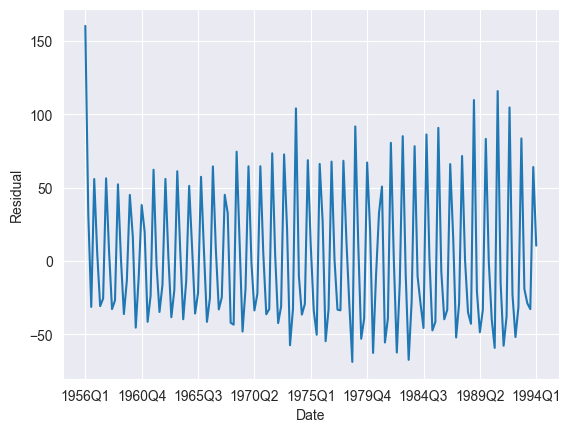

In [23]:
fig, ax = plt.subplots()
ax.plot(dates_beerpl, beer_aust.beer_prod-movingaverage(beer_aust.beer_prod, 4).MA.values);
freq = int(19)
ax.set_xticks(dates_beerpl[::freq]);
ax.set_xticklabels(dates_beerpl[::freq]);
ax.set_xlabel('Date');
ax.set_ylabel('Residual');

- Nótese que si calculamos el `residuo para una serie temporal con estacionalidad multiplicativa`, la serie resultante contiene componentes estacionales cuya `varianza aumenta cada periodo de frecuencia`.

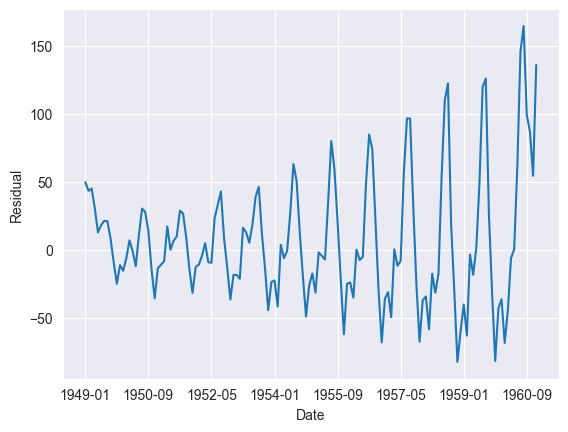

In [24]:
fig, ax = plt.subplots()
ax.plot(dates_airpassl, datasets.load_airpassengers()-movingaverage(datasets.load_airpassengers(), 12).MA.values);
freq = int(20)
ax.set_xticks(dates_airpassl[::freq]);
ax.set_xticklabels(dates_airpassl[::freq]);
ax.set_xlabel('Date');
ax.set_ylabel('Residual');

- Una alternativa para verificar estacionalidad sin usar visualziaciones, es utilizar una `prueba no paramétrica` (ver [Kruskal-Wallis test](https://jdemetradocumentation.github.io/JDemetra-documentation/pages/theory/Tests_KW.html)). Este test comprueba la `correlación entre la observación real y la observación retardada`. `Si las observaciones son independientes entre sí, siguen una distribución` $\chi^2$. `Cuando se rechaza esta hipótesis, se confirma una autocorrelación significativa, que es señal de movimientos estacionales en la serie`.

In [25]:
from scipy.stats import kruskal

def seasonality_test(series, period):
        seasonal = False
        idx = np.arange(len(series)) % period
        H_statistic, p_value = kruskal(series, idx)
        if p_value <= 0.05:
            seasonal = True
        return seasonal

In [26]:
print("Is the Air Passengers time series seasonal?:", seasonality_test(dates_airpassl, 12))

Is the Air Passengers time series seasonal?: True


In [27]:
print("Is the Beer production time series seasonal?:", seasonality_test(beer_aust.beer_prod, 4))

Is the Beer production time series seasonal?: False


- La señal de la serie temporal anterior está compuesta por la tendencia, la estacionalidad y el residuo (ruido blanco). `El suavizado ayuda a eliminar el componente residual y capta los componentes de tendencia y estacionalidad para la predicción de la señal`.

- `El primer paso del modelo para incluir la media, la tendencia y los patrones no estacionales es extrapolarla mediante la suavización`. La suavización básica mediante la media móvil se discutió en el capítulo anterior. El suavizado de media móvil evalúa las esperanzas $\textsf{E}(y_{t})$ utilizando todas las observaciones anteriores, como sigue:

$$\hat{y}_{t}=\frac{1}{N}\sum_{i=1}^{T}y_{t-i}$$

- Por lo general, `la media móvil simple se realiza sobre ventanas de predicción`; así, la predicción estimada se evalua en ventanas óptimas con el objetivo de minimizar la función de error

$$\min\left(\sum_{i=1}^{T}(y_{t}-\hat{y}_{t})^{2}\right)=\min\sum_{i=1}^{T}\left(y_{t}-\frac{1}{N}\sum_{i=1}^{T}y_{t-i}\right)^{2}$$

- Los métodos de suavización se basan en el `supuesto de que los datos de las series temporales son localmente estacionarios con pequeñas variaciones en la media`. Así, podemos utilizar la media en el momento $t$ para predecir en $t+1$ cuando el $\Delta t$ es lo suficientemente pequeño como para mantener la señal estacionaria. Este modelo es un compromiso entre la media y el modelo de paseo aleatorio sin desviación. 

- Los modelos también se denominan modelos de suavización, ya que `suavizan choques del conjunto de datos`. La principal limitación de estos métodos basados en la media móvil es que tratan todas las $n$ muestras utilizadas en el suavizado dando mayor peso a las observaciones recientes, como se muestra en la siguiente ecuación:

$$\hat{y}_{t}=\frac{1}{N}\sum_{i=1}^{T}w_{i}y_{t-i}.$$

- Aquí $w_{1}>w_{2}>\cdots>w_{T}$ y $T$ es la `longitud de la ventana`. Esto supone otro reto para la evaluación de las ponderaciones. La limitación de la media móvil y la media móvil ponderada se aborda mediante la `suavización exponencial aplicando ponderaciones con decaimiento exponencial en las observaciones`.

## Suavización exponencial de primer orden

````{prf:theorem} Suavización exponencial simple
:label: th-simple_exp_smoothing

Dada una serie de tiempo $(y_{t})_{t=1}^{T}$. Una suavización exponencial ponderada está definida por:

$$
\sum_{t=1}^{T-1}\theta^{t}y_{T-t}=y_{T}+\theta y_{T-1}+\theta^{2}y_{t-2}+\cdots+\theta^{T-1}y_{1}
$$ (eq:simple_exp_smoothing)

donde $\theta$ satisface $|\theta|<1$. Esto es, observaciones pasadas son descontadas de manera geométricamente descendiente. Entonces, la `suavización exponencial simple` está representada por:

$$
\tilde{y}_{T}=\lambda y_{T}+(1-\lambda)\tilde{y}_{T-1},\quad\text{donde}\quad\lambda=1-\theta.
$$

$\lambda$ es conocido como el `factor de descuento`. Nótese que el factor de descuento $\lambda$, representa el peso colocado sobre la última observación $y_{T}$ y $1-\lambda$ el peso asignado al valor suavizado de la previa obserrvación $\tilde{y}_{T-1}$.
````

**`Demostración`**

- Por hipótesis, pasadas observaciones son descontadas en forma geométricamente descendente, con $|\theta|<1$. Nótese que el suavizador {eq}`eq:simple_exp_smoothing` no es una media movil simple. En efecto:

$$
\begin{align*}
\sum_{t=0}^{T-1}\theta^{t}&=1+\theta+\theta^2+\cdots+\theta^{T-1},\quad\text{multiplicando por}~(1-\theta)\\
(1-\theta)\sum_{t=0}^{T-1}\theta^{t}&=(1-\theta)(1+\theta+\theta^2+\cdots+\theta^{T-1})\\
&=(1+\theta+\theta^2+\cdots+\theta^{T-1})-(\theta+\theta^2+\theta^{3}+\cdots+\theta^{T-1}+\theta^{T})\\
&=1-\theta^{T}\Longrightarrow\\
\sum_{t=0}^{T-1}\theta^{t}&=\frac{1-\theta^{T}}{1-\theta}.
\end{align*}
$$

- Nótese que la sumatoria:
    
    $$
    \sum_{t=0}^{T-1}\theta^{t}=\frac{1-\theta^{T}}{1-\theta},
    $$

    no necesariamente es igual a 1. Esto puede ser ajustado multiplicando por $(1-\theta)/(1-\theta^{T})$ la ecuación {eq}`eq:simple_exp_smoothing`.

- Además, dado que $(1-\theta)/(1-\theta^{T})\rightarrow 1-\theta$ cuando $T\rightarrow\infty,~ |\theta|<1$. Entonces {eq}`eq:simple_exp_smoothing` puede reescribirse como:

$$
\begin{align*}
\tilde{y}_{T}&=\frac{1-\theta}{1-\theta^{T}}\sum_{t=0}^{T-1}\theta^{t}y_{T-t}\overset{T\rightarrow\infty}{=}(1-\theta)\sum_{t=0}^{T-1}\theta^{t}y_{T-t}\\
&=(1-\theta)(y_{T}+\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1})
\end{align*}
$$

- Entonces la `suavización exponencial simple` está dada por

$$
\tilde{y}_{T}=(1-\theta)(y_{T}+\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1})
$$ (eq:simple_exp_smoothing2)

- Una expresión alternativa para la suavización exponencial simple es:

$$
\begin{align*}
\tilde{y}_{T}&=(1-\theta)(y_{T}+\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1}\\
&=(1-\theta)y_{T}+(1-\theta)(\theta y_{T-1}+\theta^{2}y_{T-2}+\cdots+\theta^{T-1}y_{1})\\
&=(1-\theta)y_{T}+\theta(1-\theta)(y_{T-1}+\theta y_{T-2}+\cdots+\theta^{T-2}y_{1})\\
&=(1-\theta)y_{T}+\theta\tilde{y}_{T-1}.
\end{align*}
$$

- Esto es, la suavización exponencial de primer orden, puede verse como combianción lineal de la observación actual y la observación suavizada en un tiempo previo. Definiendo $\lambda=1-\theta$, (`factor de corrección`) se tiene que:

$$
\tilde{y}_{T}=\lambda y_{T}+(1-\lambda)\tilde{y}_{T-1}.
$$ (eq:simple_exp_smoothing3)

```{admonition} Observación
:class: tip

Análogamente a la longitud del periodo en la media movil, `un asunto importante para la suavización exponencial es la selección del factor de descuento` $\lambda$. Además, a partir de la ecuación {eq}`eq:simple_exp_smoothing3` podemos observa que el cálculo de $\tilde{y}_{1}$ va a requerir conocer $\tilde{y}_{0}$.
```

````{prf:theorem} Selección de $\tilde{y}_{0}$
:label: th-initial-value-simple-exp-smoothing

Dada una serie de tiempo $(y_{t})_{t=1}^{T}$, donde $T$ es grande, la contribución de $\tilde{y}_{0}$ a $\tilde{y}_{T}$ es mínima. Por lo tanto, `la estimación de` $\tilde{y}_{0}$ `tiene poca influencia sobre la suavización`. Sin embargo, dos estimaciones de $\tilde{y}_{0}$ comunmente usadas en las aplicaciones son las siguientes:

1. $\tilde{y}_{0}=y_{1}$: Si los cambios esperados del proceso ocurren temprano y rápido, esta selección para el valor inicial de $\tilde{y}_{T}$ es razonable.
2. $\tilde{y}_{0}=\overline{y}$: Tomar el promedio de los datos disponibles. Si el proceso es constante, al menos al inicio, este sería el valor mas adecuado.
````

**`Demostración`**

- Dado que $\tilde{y}_{0}$ es necesario en el calculo recursivo que inicia con: $\tilde{y}_{1}=\lambda y_{1}+(1-\lambda)\tilde{y}_{0}$, estimamos su valor a partir de la Ecuación {eq}`eq:simple_exp_smoothing3`

$$
\begin{align*}
\tilde{y}_{1}&=\lambda y_{1}+(1-\lambda)\tilde{y}_{0}\\
\tilde{y}_{2}&=\lambda y_{2}+(1-\lambda)\tilde{y}_{1}=\lambda y_{2}+(1-\lambda)(\lambda y_{1}+(1-\lambda)\tilde{y}_{0})=\lambda(y_{2}+(1-\lambda)y_{1})+(1-\lambda)^{2}\tilde{y}_{0}\\
\tilde{y}_{3}&=\lambda y_{3}+(1-\lambda)\tilde{y}_{2}=\lambda y_{3}+(1-\lambda)(\lambda(y_{2}+(1-\lambda)\tilde{y}_{1})+(1-\lambda)^{2}\tilde{y}_{0})\\
&=\lambda(y_{3}+(1-\lambda)y_{2}+(1-\lambda)^{2}y_{1})+(1-\lambda)^{3}\tilde{y}_{0}\\
&\vdots\\
\tilde{y}_{T}&=\lambda(y_{T}+(1-\lambda)y_{T-1}+(1-\lambda)^{2}y_{T-2}+\cdots+(1-\lambda)^{T-1}y_{1})+(1-\lambda)^{T}\tilde{y}_{0}
\end{align*}
$$

- Por lo tanto, cuando $T\rightarrow\infty,~ (1-\lambda)^{T}\rightarrow 0$, esto es, la contribución de $\tilde{y}_{0}$ a $\tilde{y}_{T}$ es mínima. Esto es, la estimación de $\tilde{y}_{0}$ no es relevante para un conjunto grande de datos.

- Tomemos ahora como ejemplo el `precio de cierre de las acciones de IBM` para pronosticarlo utilizando el método de suavizado simple. El primer paso es cargar los módulos necesarios

In [28]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [29]:
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')
ibm_df.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


- Por comodidad, cambiaremos el nombre de las columnas:

In [30]:
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


- En el método de `suavización exponencial simple`, los valores predichos se generan como sigue usando Ec. {eq}`eq:simple_exp_smoothing3`. Esta serie se puede implementar en `Python` de la siguiente manera:

In [31]:
def single_exp_smoothing(x, alpha):
    F = [x[0]]
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

- La función `single_exp_smoothing` configurada con el valor inicial previsto se asigna como el primer valor de la serie. Evaluemos primero los casos extremos de previsión con $α = 0$ y $α = 1$

In [32]:
ibm_df['SES0'] = single_exp_smoothing(ibm_df['Close_Price'], 0)
ibm_df['SES1'] = single_exp_smoothing(ibm_df['Close_Price'], 1)

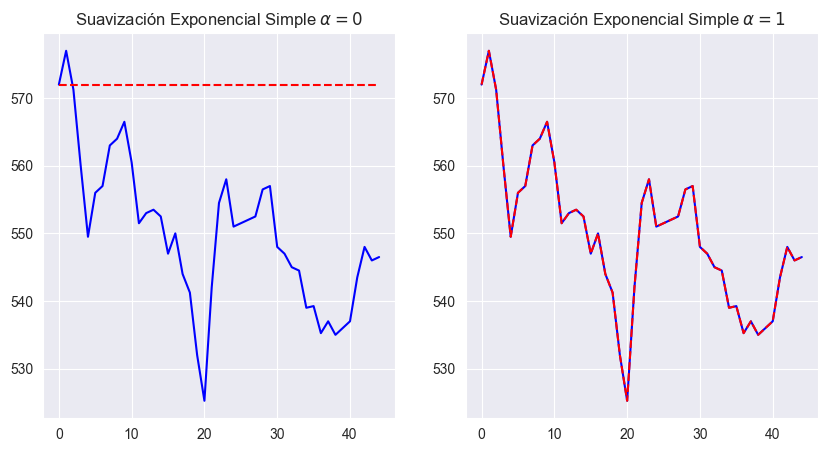

In [33]:
f, axarr = plt.subplots(1, 2, sharex=True)
f.set_size_inches(10, 5)


ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES0'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title(r'Suavización Exponencial Simple $\alpha=0$');

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES1'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title(r'Suavización Exponencial Simple $\alpha=1$');

- La figura anterior ilustra que, para $\alpha=0$, la predicción es una constante, y para $\alpha=1$, la serie pronosticada se desplaza un desfase temporal. El pronóstico de alisamiento único para valores de suavización $0.2, 0.6, 0.8$ puede evaluarse como sigue

In [34]:
ibm_df['SES2'] = single_exp_smoothing(ibm_df['Close_Price'], 0.2)
ibm_df['SES6'] = single_exp_smoothing(ibm_df['Close_Price'], 0.6)
ibm_df['SES8'] = single_exp_smoothing(ibm_df['Close_Price'], 0.8)

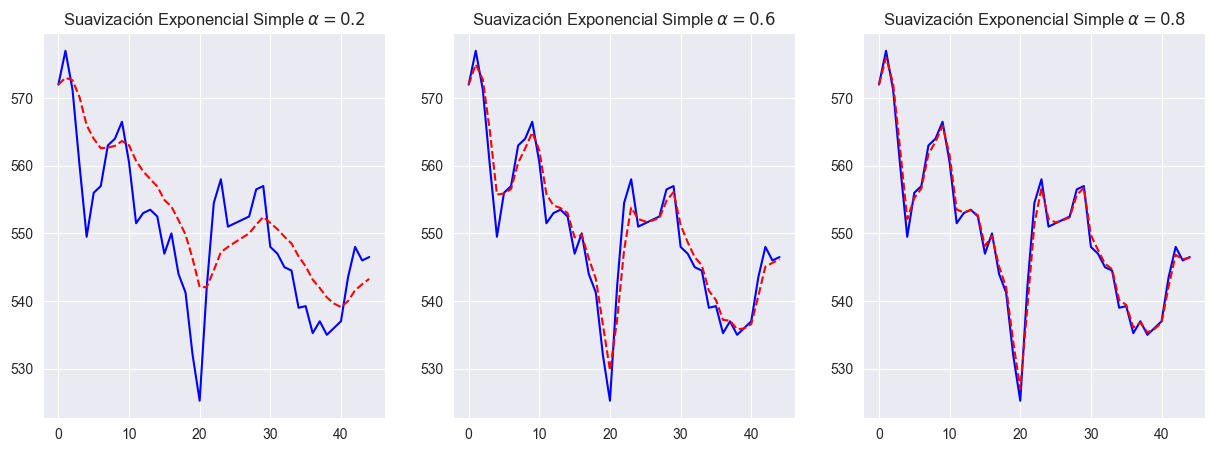

In [35]:
f, axarr = plt.subplots(1, 3, sharex=True)
f.set_size_inches(15, 5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title(r'Suavización Exponencial Simple $\alpha=0.2$');

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title(r'Suavización Exponencial Simple $\alpha=0.6$');

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title(r'Suavización Exponencial Simple $\alpha=0.8$');

- La figura anterior ilustra que $\alpha$ tiene un gran impacto en la previsión; por lo tanto, obtener el valor correcto de $\alpha$ es fundamental a la hora de establecer la previsión

- La precisión del modelo puede evaluarse en una muestra retenida utilizando funciones objetivo estándar como el `error cuadrático medio (ECM)` o `el error absoluto medio (EAM)`

$$
\begin{align*}
\text{MSE}&=\frac{1}{N}\sum_{i=1}^{N}(y_{t}-\tilde{y}_{t})^{2}\\
\text{MAD}&=\frac{1}{N}\sum_{i=1}^{N}|y_{t}-\tilde{y}_{t}|
\end{align*}
$$

- Como el suavizado ayuda a reducir la varianza del conjunto de datos, reducirá la varianza de serie pronosticada entre cero y la varianza real del conjunto de datos

$$
\begin{align*}
\text{Var}(\tilde{y}_{T})&=\text{Var}\left(\alpha\sum_{i=0}^{\infty}(1-\alpha)^{i}y_{T-i}\right)\\
&=\frac{\alpha}{2-\alpha}\text{Var}(y_{T})
\end{align*}
$$

- Aquí, $T$ es la longitud de la serie temporal. Para una varianza unitaria de la serie $y_{T}$, la varianza captada por la serie pronosticada variará en función del parámetro de suavización α

## Suavización exponencial de segundo orden

- Si la suavización exponencial de primer orden no entrega la mejor bondad de ajuste, entonces `existe tendencia en los datos de la serie temporal`. La tendencia se observa habitualmente en muchos ámbitos, como cuando en las empresas de comercio electrónico o de marketing existe un `aumento de las ventas` o cuando cualquier `buen rendimiento anual de una empresa tendrá un efecto alcista en el precio de sus acciones`. La `tendencia lineal` puede ocurrir entre el tiempo y la respuesta:

    $$
    y_{t}=\omega_{0}+\omega_{1}t+\varepsilon_{t}
    $$
    donde, $\omega$ es el coeficiente que conduce a la tendencia. 

- El `suavizado exponencial de segundo orden` ayuda a `capturar la tendencia en los datos de serie temporal` incluyendo otro término en el suavizado exponencial de primer orden como sigue

$$
\begin{align*}
F_{t+1}&=\alpha y_{t}+(1-\alpha)(F_{t-1}+T_{t-1})\\
T_{t+1}&=\beta(F_{t}-F_{t-1})+(1-\beta)T_{t-1}
\end{align*}
$$

- Aquí $\alpha$ es el `factor de suavización` de los datos y $\beta$ es el `factor de suavización de la tendencia` con valores en el intervalo $[0, 1]$. La predicción en el tiempo posterior $t+1$ puede generarse como sigue

$$
\hat{y}_{t+1}=F_{t}+T_{t}
$$

- En la `suavización de segundo orden`, el `valor inicial del componente de tendencia` puede asignarse de múltiples maneras:

    $$
    \begin{align*}T_{1}&=y_{2}-y_{1}\\
    T_{1}&=(y_{n}-y_{1})/(n-1)
    \end{align*}
    $$
    donde, $n$ es el número de observaciones. 
    
- Estudiemos un ejemplo donde usemos `suavización de segundo orden`. Utilizaremos datos de `producción de cerveza` estudiados anteriormente

In [36]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [37]:
beer_df = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
print('Dimensión del dataframe:', beer_df.shape)

beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':'Beer_Prod'},
               inplace=True)
    
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Número de filas con al menos un valor igual a cero:', missing.sum())
beer_df = beer_df.loc[~missing, :]

print('Dimensiones después de eliminar los valores perdidos:', beer_df.shape)
beer_df.head()

Dimensión del dataframe: (155, 2)
Número de filas con al menos un valor igual a cero: 1
Dimensiones después de eliminar los valores perdidos: (154, 2)


,Quarter,Beer_Prod
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


- Creamos la función para el `suavizado exponencial doble`

In [38]:
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

- La función anterior toma como entrada la serie temporal `x` con `alpha` y `beta`. La implementación anterior utiliza la `diferencia de las dos primeras ocurrencias para establecer el valor de la tendencia inicial`. Vamos a evaluar el rendimiento en los casos límite, es decir, `(alpha, beta)`$\in\{(0, 0), (0, 1), (1, 0), (1, 1)\}$.

In [39]:
beer_df['DEF00'] = double_exp_smoothing(beer_df['Beer_Prod'], 0, 0)
beer_df['DEF01'] = double_exp_smoothing(beer_df['Beer_Prod'], 0, 1)
beer_df['DEF10'] = double_exp_smoothing(beer_df['Beer_Prod'], 1, 0)
beer_df['DEF11'] = double_exp_smoothing(beer_df['Beer_Prod'], 1, 1)

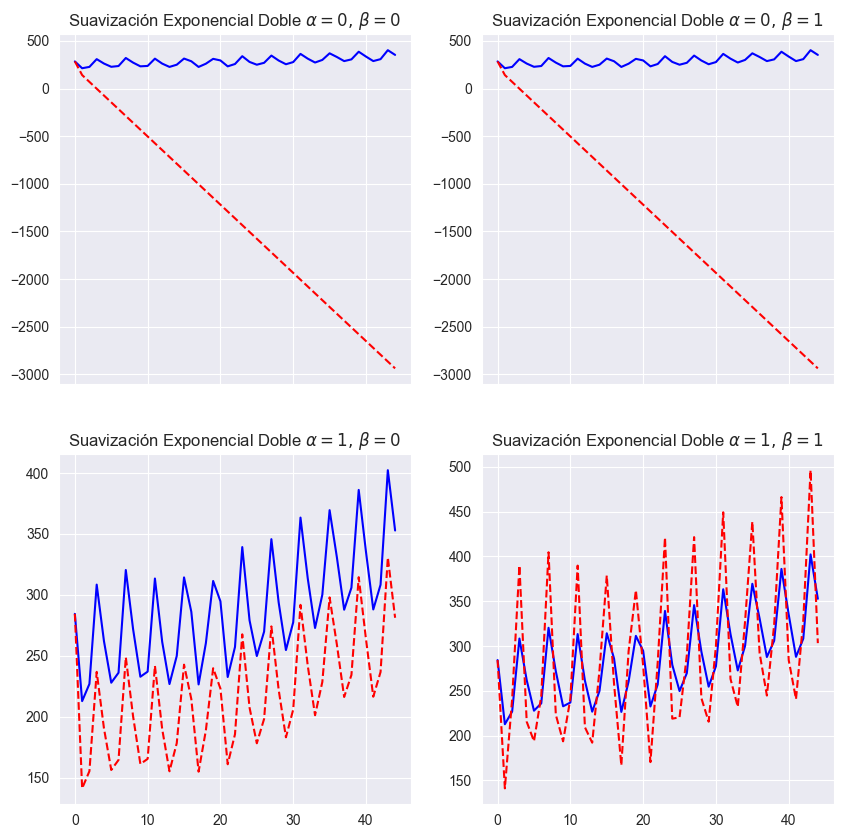

In [40]:
f, axarr = plt.subplots(2, 2, sharex=True)
f.set_size_inches(10, 10)

beer_df['Beer_Prod'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0, 0])
beer_df['DEF00'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0, 0])
axarr[0, 0].set_title(r'Suavización Exponencial Doble $\alpha=0,\,\beta=0$')

beer_df['Beer_Prod'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0, 1])
beer_df['DEF01'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0, 1])
axarr[0, 1].set_title(r'Suavización Exponencial Doble $\alpha=0,\,\beta=1$')

beer_df['Beer_Prod'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1, 0])
beer_df['DEF10'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1, 0])
axarr[1, 0].set_title(r'Suavización Exponencial Doble $\alpha=1,\,\beta=0$');

beer_df['Beer_Prod'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1, 1])
beer_df['DEF11'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1, 1])
axarr[1, 1].set_title(r'Suavización Exponencial Doble $\alpha=1,\,\beta=1$');

- Cuando `alpha=0`, los `valores iniciales permanecen constantes`; por lo tanto, `el parámetro de tendencia no desempeña ningún papel`. Sin embargo, cuando `alpha = 1 y beta = 0`, la `suavización exponencial de segundo orden` puede escribirse de la siguiente manera

$$
\begin{align*}
F_{t}&=y_{t-1}\\
T_{t}&=T_{t-1}\\
\hat{y}_{t}&=y_{t-1}+T_{t-1}
\end{align*}
$$

- `La predicción en el tiempo` $t$ `depende del valor anterior y de los componentes de tendencia`. Como `beta se fija en cero`, el componente de tendencia en $t-1$ dependerá de $t-2$, el de $t-2$ de $t-3$ y así sucesivamente

$$
T_{t}=T_{t-1}=T_{t-2}=T_{t-3}=\cdots=T_{0}
$$

- Así, `el valor del componente de tendencia depende del valor inicial asignado y es una constante`. Del mismo modo, para `alpha = 1 y beta = 1`, la `suavización exponencial de segundo orden` puede simplificarse como sigue

$$
\begin{align*}
F_{t}&=y_{t-1}\\
T_{t}&=(F_{t-1}-F_{t-2})=y_{t-2}-y_{t-3}\\
\hat{y}_{t}&=y_{t-1}+(y_{t-2}-y_{t-3})
\end{align*}
$$

- Con `alpha = 1 y beta = 1`, la diferencia de las observaciones en los tiempos $t-2$ y $t-3$ se añaden al valor de predicción en el tiempo $t$ en comparación con la configuración de `alpha = 1 y beta = 0`, que da el desplazamiento a la predicción y `se acerca más a la previsión real`

- Realizamos a continuación un `suavizado exponencial doble` con los datos de producción de cerveza `utilizando valores intermedios de alpha y beta` de la siguiente manera

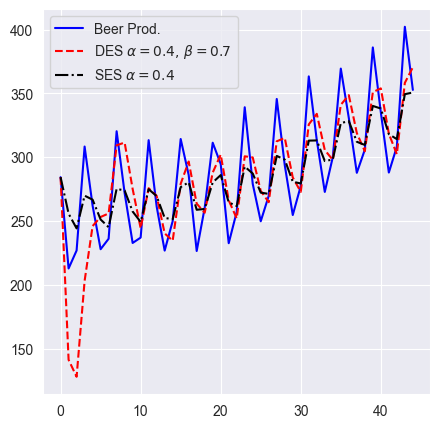

In [41]:
beer_df['DEF'] = double_exp_smoothing(beer_df['Beer_Prod'], 0.4, 0.7)
beer_df['Single_Exponential_Forecast'] = single_exp_smoothing(beer_df['Beer_Prod'], 0.4)

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
beer_df['Beer_Prod'].iloc[:45].plot(color='b', linestyle = '-', label = 'Beer Prod.')
beer_df['DEF'].iloc[:45].plot(color='r', linestyle = '--', label = r'DES $\alpha=0.4,\,\beta=0.7$')
beer_df['Single_Exponential_Forecast'].iloc[:45].plot(color='k', linestyle = '-.', label = r'SES $\alpha=0.4$')
leg = ax.legend();

- La figura anterior muestra que `el suavizado exponencial doble es capaz de capturar mejor la variación de la señal real para el conjunto de datos actual en comparación con el suavizado exponencial simple`. Sin embargo, en los escenarios en los que el componente de tendencia tienden a cero, el rendimiento del suavizado exponencial simple y doble es comparable.

## Suavización exponencial de orden superior

- El concepto puede extenderse a la `suavización exponencial de orden superior` con un modelo polinómico de $n^{\text{th}}$ orden

$$
y_{t}=\alpha_{0}+\alpha_{1}t+\frac{\alpha_{2}}{2!}t^{2}+\cdots+\frac{\alpha_{n}}{n!}t^{n}+\varepsilon_{t}
$$

- Aquí, el error $\varepsilon_{t}\sim N(0,\sigma^{2})$ se distribuye normalmente con media $0$ y varianza $\sigma^{2}$. Los suavizadores exponenciales utilizados para el orden superior son los siguientes

$$
\begin{align*}
\tilde{x}_{t}^{(1)}&=k y_{t}+(1-k)\tilde{x}_{t-1}^{(1)}\\
\tilde{x}_{t}^{(2)}&=k \tilde{x}_{t}^{(1)}+(1-k)\tilde{x}_{t-1}^{(2)}\\
&\vdots\\
\tilde{x}_{t}^{(n)}&=k \tilde{x}_{t}^{(n-1)}+(1-k)\tilde{x}_{t-1}^{(n)}
\end{align*}
$$

- En este caso, se trata de pesos para los suavizadores. `Normalmente, la suavización exponencial de orden superior no se utiliza, el cálculo es muy difícil`, mas bien, se utilizan modelos `Autorregrsivos Integrados de Media Movil(ARIMA)` los cuales se tratarán con más detalle en la siguiente sección.

- Otro suavizado exponencial muy popular es el `suavizado exponencial triple  (Holt Winters)`. El `suavizado exponencial triple` permite capturar la `estacionalidad con el nivel (valor suavizado de la parte constante en el tiempo) y la tendencia`. La relación entre: `niveles, tendencias y la estacionalidad` se define mediante el siguiente conjunto de ecuaciones

$$
\begin{align*}
F_{t}&=\alpha(y_{t}-S_{t-L})+(1-\alpha)(F_{t-1}+T_{t-1})
\end{align*}
$$

- En estas ecuaciones, $F_{t}$ `capta los niveles de observación ` en el momento $t$. Asimismo, $T_{t}$ y $S_{t}$ capturan `tendencia y estacionalidad` en el tiempo $t$. Los coeficientes $\alpha, \beta$ `representan: factor de suavización de los datos, factor de suavización de la tendencia y factor de suavización de la estacionalidad`, respectivamente con valores en el intervalo $[0,1]$. Estas ecuaciones pueden utilizarse para pronosticar el siguiente período de tiempo de la siguiente manera

$$
\begin{align*}
T_{t}&=\beta(F_{t}-F_{t-1})+(1-\beta)T_{t-1}\\
S_{t}&=\gamma(y_{t}-F_{t})+(1-\gamma)S_{t-C}
\end{align*}
$$

- El término $F_{t}$ `recoge el desfase de los componentes estacionales con respecto a la última tendencia estacional observada`. Usemos `suavización exponencial triple para los datos de empleo de Wisconsin`

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Shape of the DataFrame: (178, 2)


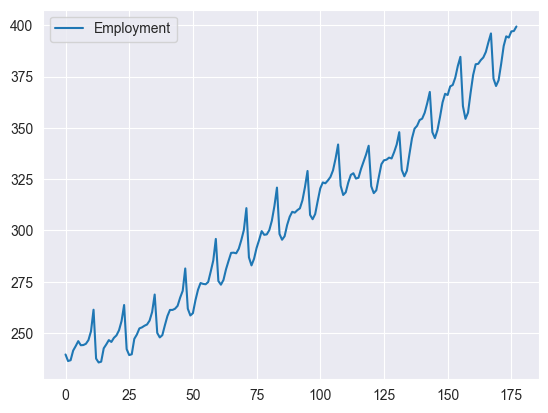

In [41]:
wisc_emp = pd.read_csv('datasets/wisconsin-employment-time-series.csv')
print('Shape of the DataFrame:', wisc_emp.shape)
wisc_emp.head();
wisc_emp.plot();

- La figura anterior muestra el conjunto de datos de series temporales, `Employment` de `Wisconsin`. El conjunto de datos consta de `tendencia anual y estacionalidad mensual`. Dado que el patrón de estacionalidad de los datos es conocido, la información sobre la estacionalidad puede utilizarse para `derivar el valor inicial de la tendencia como el valor medio de las estaciones` utilizando la siguiente ecuación

$$
T_{0}=\frac{1}{C}\left(\frac{y_{C+1}-y_{1}}{C}+\frac{y_{C+2}-y_{2}}{C}+\frac{y_{C+3}-y_{3}}{C}+\cdots\right)
$$

- La ecuación anterior puede implementarse en `Python` como sigue:

In [42]:
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total

- Por ejemplo, el valor de `tendencia inicial` generado por la función anterior es $1.69$ utilizando el script `initialize_T()`

In [43]:
initialize_T(wisc_emp['Employment'], 12)

1.6916666666666653

- La `estacionalidad inicial` es de suma importancia y se puede calcular con la siguiente función. Los valores iniciales de las estaciones se calculan como valor medio de la respuesta $x$

In [44]:
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)

    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))
    
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons

In [45]:
initialize_seasonalilty(wisc_emp['Employment'], 12)   

{0: -11.325000000000015,
 1: -14.48214285714287,
 2: -12.667857142857159,
 3: -6.403571428571445,
 4: -1.603571428571444,
 5: 1.5535714285714164,
 6: 1.0821428571428413,
 7: 2.22499999999998,
 8: 3.539285714285705,
 9: 6.89642857142856,
 10: 11.774999999999986,
 11: 19.410714285714267}

- Una vez obtenidos los valores, estamos listos para establecer la predicción utilizando `suavización exponencial triple`

In [46]:
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma, h):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)+h):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat

- La `suavización exponencial triple` está controlada por `alpha, beta y gamma`. La presencia o ausencia de cualquier escenario tendrá un efecto drástico en el resultado. Hagamos una comparación empírica para diferentes escenarios extremos. Vamos a `ejecutar el suavizado exponencial con parámetros intermedios`, como se muestra en la siguiente figura

In [47]:
wisc_emp['TES']=triple_exp_smoothing(wisc_emp['Employment'], 12, 0.4, 0.6, 0.2, 0)

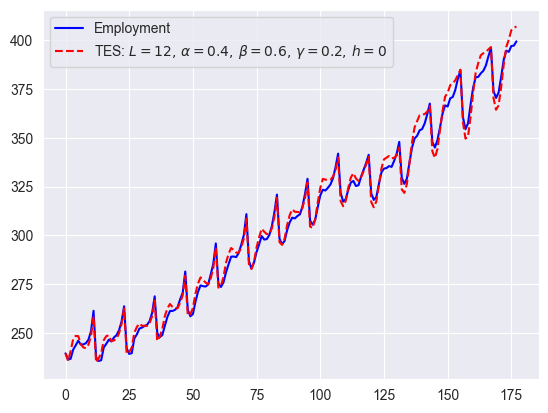

In [48]:
fig = plt.figure()
ax = fig.add_subplot()

wisc_emp['Employment'].plot(ax=ax, color='b', linestyle = '-', label = 'Employment')
wisc_emp['TES'].plot(ax=ax, color='r', linestyle = '--', 
                     label = r'TES: $L=12,\,\alpha=0.4,\,\beta=0.6,\,\gamma=0.2,\,h=0$')
leg = ax.legend();

- Si comparamos este ajuste con las `suavizaciones de primer y segundo orden obtenemos`

In [49]:
wisc_emp['DES'] = double_exp_smoothing(wisc_emp['Employment'], 0.4, 0.6)
wisc_emp['SES'] = single_exp_smoothing(wisc_emp['Employment'], 0.4)

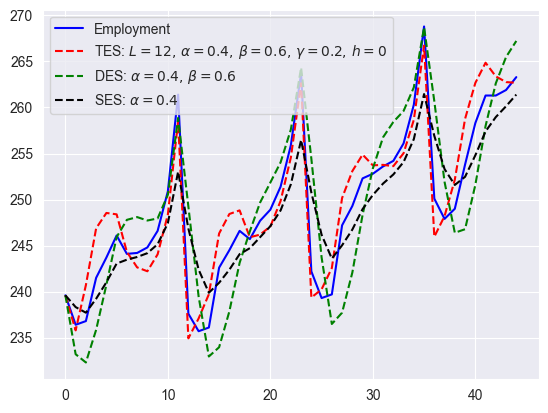

In [50]:
fig = plt.figure()
ax = fig.add_subplot()

wisc_emp['Employment'].iloc[:45].plot(ax=ax, color='b', linestyle = '-', label = 'Employment')
wisc_emp['TES'].iloc[:45].plot(ax=ax, color='r', linestyle = '--', 
                     label = r'TES: $L=12,\,\alpha=0.4,\,\beta=0.6,\,\gamma=0.2,\,h=0$')
wisc_emp['DES'].iloc[:45].plot(ax=ax, color='g', linestyle = '--', label = r'DES: $\alpha=0.4,\,\beta=0.6$')
wisc_emp['SES'].iloc[:45].plot(ax=ax, color='k', linestyle = '--', label = r'SES: $\alpha=0.4$')
leg = ax.legend();

- Según los estudios numéricos, el nivel único que utiliza el suavizado o la estacionalidad es capaz de capturar tendencia en los datos; por tanto, todos los modelos funcionaron bien, ya que `el suavizado exponencial simple y el doble fueron capaces de utilizar el factor de suavización para hacer las predicciones` y la `suavización exponencial triple es capaz de capturas las predicciones utilizando los factores de suavización o estacionalidad`.

## Resumen

- Este capítulo trata de los enfoques de suavización exponencial para datos de series temporales. Los enfoques pueden ampliarse fácilmente para la predicción mediante la inclusión de términos como el `factor de suavización, factor de tendencia y factor de estacionalidad`. 

- El suavizado exponencial de orden único realiza la suavización utilizando sólo el factor $\lambda$, que se amplía con los factores $\alpha,\,\beta$ de segundo orden al incluir tendencia. `La suavización de tercer orden incorpora todos los factores, tendencia y estacionalidad en el modelo`.

- En este capítulo se han tratado todos estos modelos en detalle con su implementación en `Python`. El enfoque de `suavizado exponencial puede utilizarse para pronosticar series temporales estacionarias`. Sin embargo, esta suposición puede no ser cierta. `Se recomienda el suavizado exponencial de orden superior para estos casos`, pero su cálculo es difícil y costoso computacionalmente. Por lo tanto, para hacer frente a este planteamiento, `se utilizan otras técnicas de previsión como el modelo ARIMA, que se tratará en la siguiente sección`.